In [56]:
# import piplite
# await piplite.install(['numpy'],['pandas'])
# await piplite.install(['seaborn'])

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
import requests
import pandas as pd
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'


response = requests.get(URL)
response.raise_for_status() 


In [59]:
boston_df=pd.read_csv(io.StringIO(response.text))

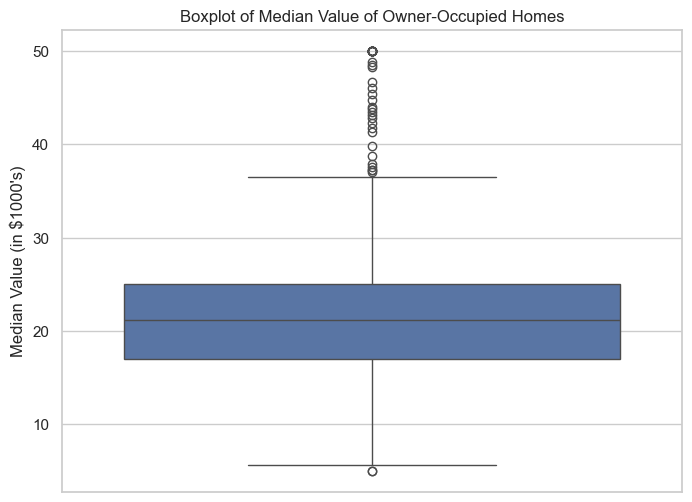

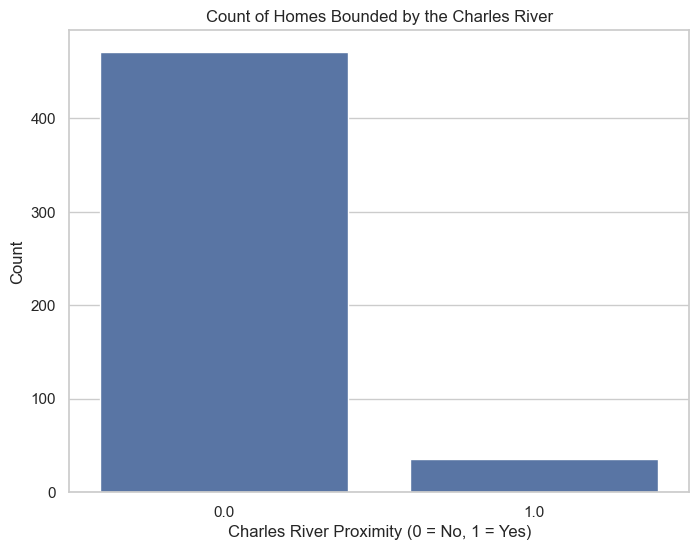

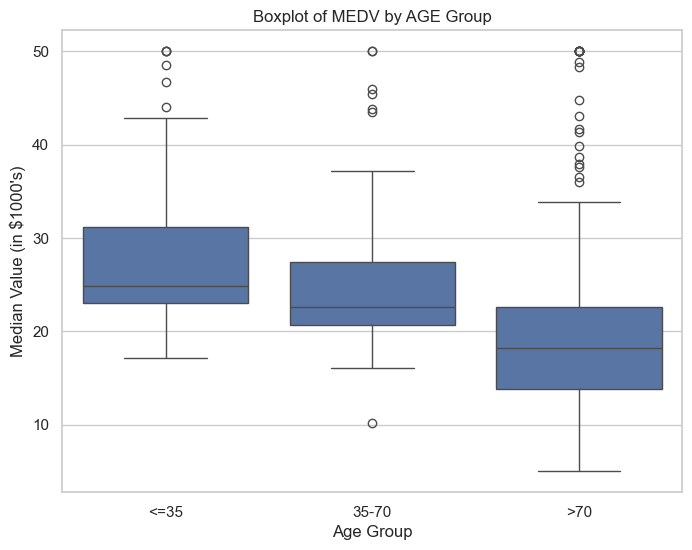

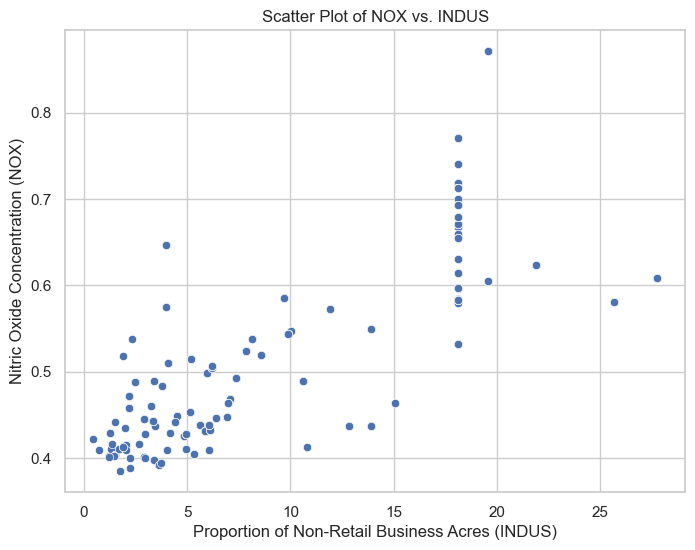

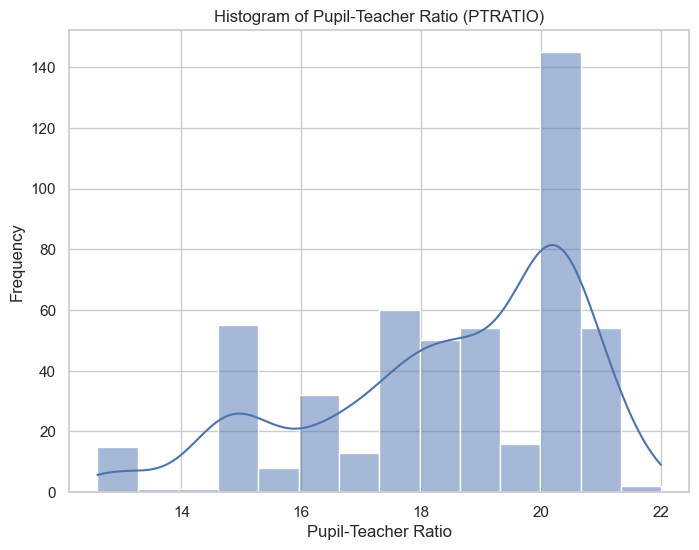

T-Test Results:
t-statistic: 3.996437466090509
p-value: 7.390623170519905e-05
ANOVA Results:
F-statistic: 36.40764999196599
p-value: 1.7105011022702984e-15
Pearson Correlation Results:
Correlation Coefficient: 0.763651446920915
p-value: 7.913361061241532e-98
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           1.21e-08
Time:                        17:45:39   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            no

In [ ]:

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(y=boston_df['MEDV'])
plt.title("Boxplot of Median Value of Owner-Occupied Homes")
plt.ylabel("Median Value (in $1000's)")
plt.show()
plt.figure(figsize=(8, 6))
sns.countplot(x='CHAS', data=boston_df)
plt.title("Count of Homes Bounded by the Charles River")
plt.xlabel("Charles River Proximity (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['<=35', '35-70', '>70'])

plt.figure(figsize=(8, 6))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
plt.title("Boxplot of MEDV by AGE Group")
plt.xlabel("Age Group")
plt.ylabel("Median Value (in $1000's)")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title("Scatter Plot of NOX vs. INDUS")
plt.xlabel("Proportion of Non-Retail Business Acres (INDUS)")
plt.ylabel("Nitric Oxide Concentration (NOX)")
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(boston_df['PTRATIO'], kde=True)
plt.title("Histogram of Pupil-Teacher Ratio (PTRATIO)")
plt.xlabel("Pupil-Teacher Ratio")
plt.ylabel("Frequency")
plt.show()


medv_chas1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_chas0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_value_ttest = stats.ttest_ind(medv_chas1, medv_chas0)
print("T-Test Results:")
print("t-statistic:", t_stat)
print("p-value:", p_value_ttest)

age_groups = [boston_df[boston_df['AGE_group'] == grp]['MEDV'] for grp in boston_df['AGE_group'].cat.categories]
f_stat, p_value_anova = stats.f_oneway(*age_groups)
print("ANOVA Results:")
print("F-statistic:", f_stat)
print("p-value:", p_value_anova)

correlation_coef, p_value_corr = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("Pearson Correlation Results:")
print("Correlation Coefficient:", correlation_coef)
print("p-value:", p_value_corr)

regression_model = ols('MEDV ~ DIS', data=boston_df).fit()

print(regression_model.summary())
